In [47]:
# importing module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import statsmodels
import statsmodels.api as sm 
import sklearn

In [48]:
# load the data
hrt = pd.read_csv(r"C:\Users\91968\Downloads\d\python\project\Heart Disease Prediction\HeartDisease.csv")

In [49]:
# info of data
hrt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [50]:
# description of data
hrt.describe()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [51]:
# checking null values in data
hrt.isna().sum()

age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

In [52]:
# changing data type of target variable to category
hrt['target'] = hrt['target'].astype('category')

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'chest_pain'}>,
        <AxesSubplot:title={'center':'rest_bps'}>],
       [<AxesSubplot:title={'center':'cholestrol'}>,
        <AxesSubplot:title={'center':'fasting_blood_sugar'}>,
        <AxesSubplot:title={'center':'rest_ecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exer_angina'}>,
        <AxesSubplot:title={'center':'old_peak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thalassemia'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

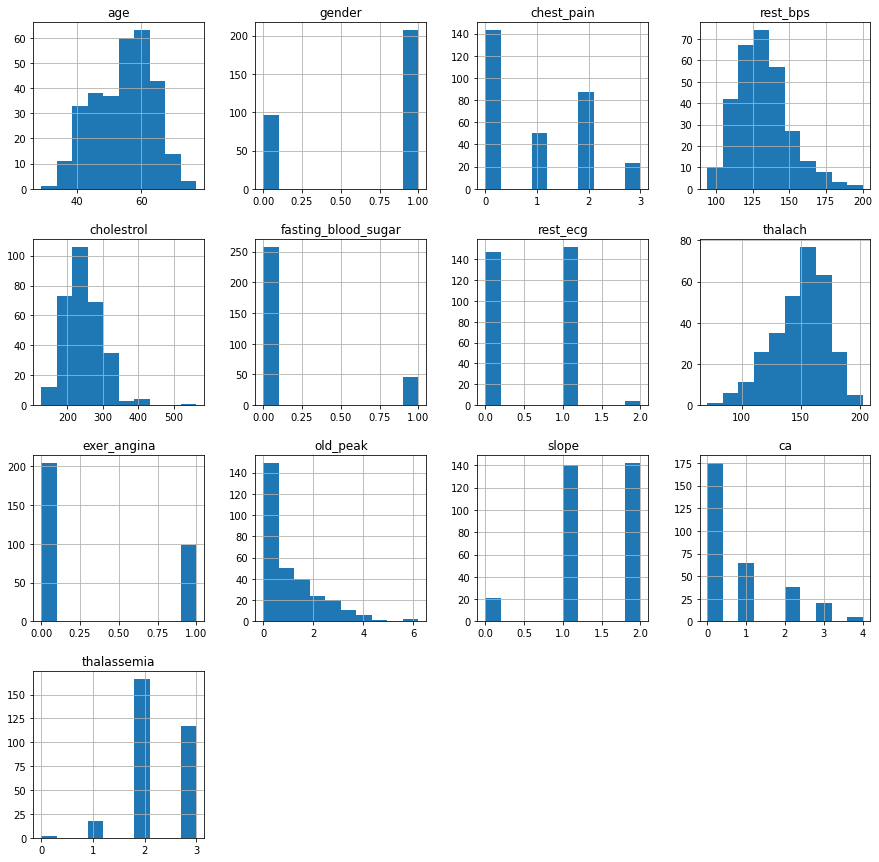

In [53]:
# plotting histogram
hrt.hist(figsize=(15,15))

<AxesSubplot:>

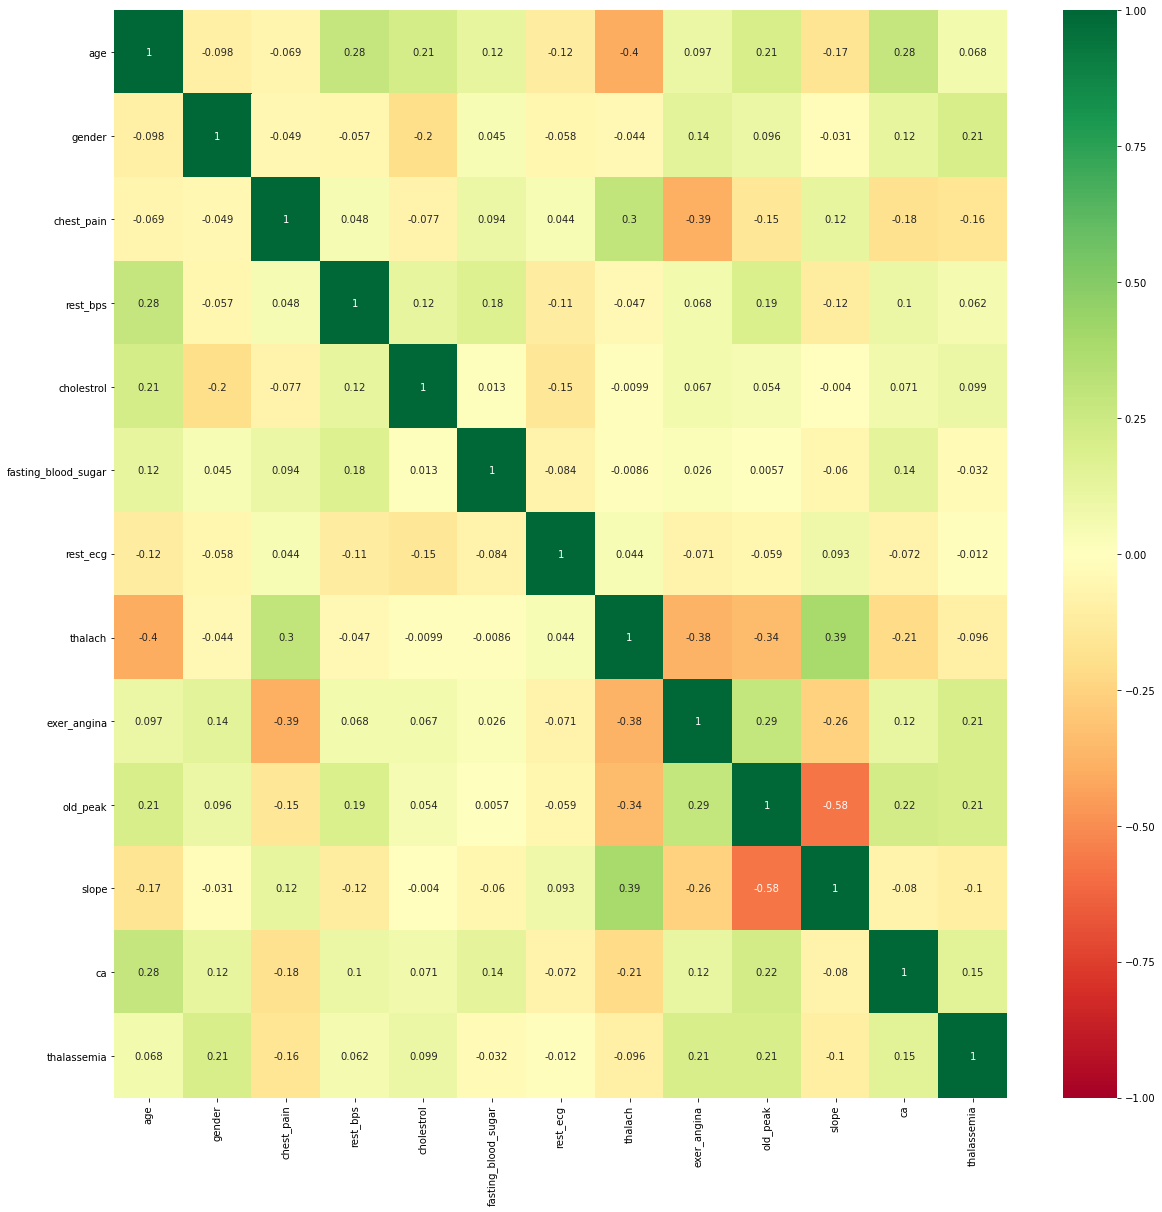

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline
corr_df=hrt.corr(method='pearson')

plt.figure(figsize=(20,20))
sns.heatmap(corr_df,vmax=1.0,vmin=-1,annot=True,cmap='RdYlGn')

In [55]:
hrt.head(7)

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


In [56]:
# shape of data
hrt.shape

(303, 14)

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [58]:
X=hrt.drop(['target'],axis=1)
Y=hrt['target']

In [59]:
#scaling the data
scaler=StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

In [60]:
X

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

### model building

In [61]:
#split the data into train test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,
                                              random_state=0)

In [62]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [63]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,2,3,5,10,15,20],
            'kernel': ['rbf','linear']
        }  
    },
    'decision_tree': {
            'model': DecisionTreeClassifier(splitter='best'),
            'params': {
                'criterion': ['gini', 'entropy'],
            }
     },
    'random_forest': {
        'model': RandomForestClassifier(random_state=0),
        'params' : {
            'n_estimators': [1,5,20,50,100,200]
        }
    },
    'knn':{
        
        
        'model' : KNeighborsClassifier(),
        'params' :{
           'n_neighbors' :[1,2,3,4,5,10,15,20]
               
        }
    },
'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
         'params': {
            'C': [1,5,10]
      }
    }
}

In [64]:
from sklearn.model_selection import GridSearchCV
scores=[]
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
        
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.806293,"{'C': 1, 'kernel': 'linear'}"
1,decision_tree,0.756463,{'criterion': 'gini'}
2,random_forest,0.831037,{'n_estimators': 100}
3,knn,0.843282,{'n_neighbors': 15}
4,logistic_regression,0.806037,{'C': 1}


#### Random Forest

In [65]:
from sklearn.model_selection import GridSearchCV
param_dict = dict(n_estimators= [1,5,20,50,100,200])

In [66]:
grid = GridSearchCV(RandomForestClassifier(random_state=0), param_dict,cv=5, scoring='accuracy', return_train_score = False)

In [67]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'n_estimators': [1, 5, 20, 50, 100, 200]},
             scoring='accuracy')

In [68]:
pd.DataFrame(grid.cv_results_)[['mean_test_score','std_test_score','params']]

,mean_test_score,std_test_score,params
0,0.677551,0.051002,{'n_estimators': 1}
1,0.748384,0.056981,{'n_estimators': 5}
2,0.789541,0.038446,{'n_estimators': 20}
3,0.814626,0.060729,{'n_estimators': 50}
4,0.831037,0.049534,{'n_estimators': 100}
5,0.822704,0.048434,{'n_estimators': 200}


In [69]:
grid.best_score_

0.8310374149659863

In [70]:
grid.best_params_

{'n_estimators': 100}

In [71]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RandomForestClassifier(n_estimators=100, random_state=0), x_train, y_train, cv=5)

In [72]:
scores.mean()

0.8310374149659863

In [73]:
classifier=RandomForestClassifier(n_estimators=100,random_state=0)
classifier.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [74]:
y_pred=classifier.predict(x_test)

In [75]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [76]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm=confusion_matrix(y_test,y_pred)
print(cfm)
print('classification report:')
print(classification_report(y_test,y_pred))

acc=accuracy_score(y_test,y_pred)
print('accuracy of the model:',acc)

[[24  3]
 [ 5 29]]
classification report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        27
           1       0.91      0.85      0.88        34

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

accuracy of the model: 0.8688524590163934


#### KNN

In [77]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(KNeighborsClassifier(n_neighbors = 2), x_train, y_train, cv=5)

In [78]:
scores.mean()

0.756547619047619

In [79]:
classifier=KNeighborsClassifier(n_neighbors = 2)
classifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [80]:
y_pred=classifier.predict(x_test)

In [81]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm=confusion_matrix(y_test,y_pred)
print(cfm)
print('classification report:')
print(classification_report(y_test,y_pred))

acc=accuracy_score(y_test,y_pred)
print('accuracy of the model:',acc)

[[24  3]
 [ 8 26]]
classification report:
              precision    recall  f1-score   support

           0       0.75      0.89      0.81        27
           1       0.90      0.76      0.83        34

    accuracy                           0.82        61
   macro avg       0.82      0.83      0.82        61
weighted avg       0.83      0.82      0.82        61

accuracy of the model: 0.819672131147541


#### SVM

In [82]:
svm_model=cross_val_score(svm.SVC(gamma='auto',kernel="rbf", probability=True, C=2), x_train, y_train, cv=5)

In [83]:
svm_model.mean()

0.7939625850340135

In [84]:
classifier=svm.SVC(gamma='auto',kernel="rbf", probability=True, C=2)
classifier.fit(x_train,y_train)

SVC(C=2, gamma='auto', probability=True)

In [85]:
y_pred=classifier.predict(x_test)

In [86]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm=confusion_matrix(y_test,y_pred)
print(cfm)
print('classification report:')
print(classification_report(y_test,y_pred))

acc=accuracy_score(y_test,y_pred)
print('accuracy of the model:',acc)

[[23  4]
 [ 3 31]]
classification report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.87        27
           1       0.89      0.91      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61

accuracy of the model: 0.8852459016393442


#### Logistic Regression

In [87]:
#create a model
classifier=LogisticRegression()
classifier.fit(x_train,y_train)


LogisticRegression()

In [88]:
#predict using the model
y_pred=classifier.predict(x_test)

In [89]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm=confusion_matrix(y_test,y_pred)
print(cfm)
print('classification report:')
print(classification_report(y_test,y_pred))

acc=accuracy_score(y_test,y_pred)
print('accuracy of the model:',acc)

[[21  6]
 [ 3 31]]
classification report:
              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61

accuracy of the model: 0.8524590163934426
